# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# We normally normalize image data to 0 and 1 

# Loading MNIST data

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
# TF already did train test for us, we need to do tuple unpacking
(X_train, y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [6]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
single_image = X_train[0]

In [12]:
single_image.shape

(28, 28)

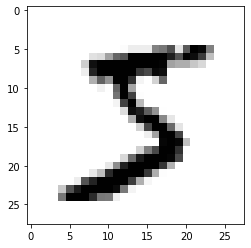

In [14]:
plt.imshow(single_image, cmap='binary')

In [20]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
y_train[0]
# We need to one-hot encode this

5

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_train.shape

(60000,)

In [21]:
y_example = to_categorical(y_train)

In [22]:
y_example.shape

(60000, 10)

In [23]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [24]:
y_example[0] # index position 5 is 1, indicating it belongs to class 5

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# One-hot encoding

In [25]:
y_cat_test = to_categorical(y_test, num_classes=10)
y_cat_train = to_categorical(y_train, num_classes=10)

In [30]:
single_image.max()

255

In [31]:
single_image.min()

0

In [32]:
# We fit on training data and transform on testing data
# But an easy way is that we know it will go from 0(black) to 255(white), so lets normalize them on that only

In [33]:
X_train = X_train/255

In [34]:
X_test = X_test/255

In [38]:
scaled_image = X_train[0]
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [39]:
scaled_image.max()

1.0

In [40]:
scaled_image.min()

0.0

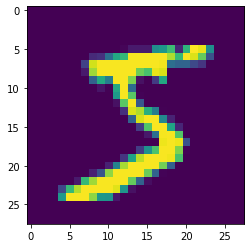

In [41]:
plt.imshow(scaled_image)

In [42]:
X_train.shape
# We need to add one more dimension to indicate we have 1 color_chanels

(60000, 28, 28)

In [43]:
# batch_size, width, height, color_chanels
X_train = X_train.reshape(60000,28,28,1)

In [46]:
X_train.shape

(60000, 28, 28, 1)

In [47]:
X_test.shape

(10000, 28, 28)

In [48]:
X_test = X_test.reshape(10000,28,28,1)

In [49]:
X_test.shape

(10000, 28, 28, 1)

# Model

In [50]:
from tensorflow.keras.models import Sequential # Model remains the same, but layers change from ANN

In [51]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [52]:
28/4 #no need of padding

7.0

In [53]:
28*28

784

In [56]:
model = Sequential()


# Choose filters in powers of 2, the more the better for complex images
# Strides are small here because the image size is 28x28 only

model.add(Conv2D(filters=32, kernel_size=(4,4),
                input_shape=(28,28,1), activation='relu'))

#pool_size half of kernel
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten image means 28x28 images becomes 784 array
model.add(Flatten())

model.add(Dense(128, activation='relu'))

#Output layer
# activation is softmax because multi-class classification
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', 
             metrics = ['accuracy']) # find all metrics at 'keras.io/metrics'

In [57]:
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
early_stop = EarlyStopping(monitor='val_loss', patience=1 ) #monitor can also be 'val_accuracy'

In [59]:
model.fit(X_train, y_cat_train, epochs = 10, validation_data = (X_test, y_cat_test), 
         callbacks = [early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 245us/sample - loss: 0.1370 - accuracy: 0.9591 - val_loss: 0.0556 - val_accuracy: 0.9811
Epoch 2/10
60000/60000 [==============================] - 14s 230us/sample - loss: 0.0465 - accuracy: 0.9856 - val_loss: 0.0491 - val_accuracy: 0.9835
Epoch 3/10
60000/60000 [==============================] - 14s 227us/sample - loss: 0.0297 - accuracy: 0.9908 - val_loss: 0.0368 - val_accuracy: 0.9868
Epoch 4/10
60000/60000 [==============================] - 14s 225us/sample - loss: 0.0193 - accuracy: 0.9938 - val_loss: 0.0395 - val_accuracy: 0.9876


In [62]:
metrics = pd.DataFrame(model.history.history)

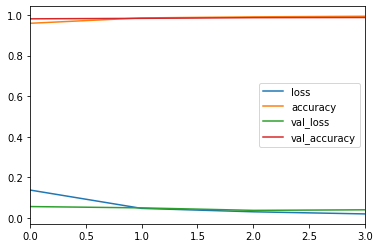

In [63]:
metrics.plot() # This will not help as such, we need to plot seperate columns in plots

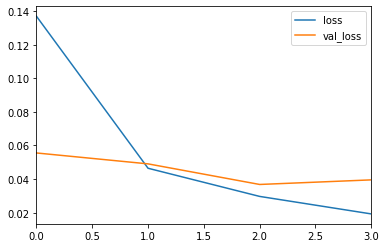

In [66]:
metrics[['loss','val_loss']].plot()

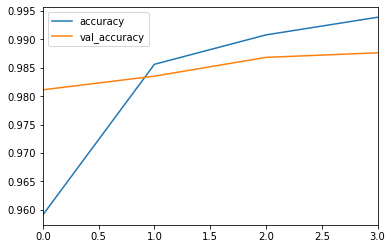

In [67]:
metrics[['accuracy','val_accuracy']].plot()

In [70]:
model.metrics_names

['loss', 'accuracy']

In [71]:
model.evaluate(X_test, y_cat_test, verbose=0)

[0.03953201437534299, 0.9876]

In [72]:
from sklearn.metrics import classification_report, confusion_matrix

In [73]:
predictions = model.predict_classes(X_test)

In [74]:
y_cat_test.shape # We dont pass this instead we use y_test only, as there is extra layer in it

(10000, 10)

In [75]:
predictions.shape

(10000,)

In [76]:
y_test.shape

(10000,)

In [79]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.97      0.98       892
           6       0.98      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



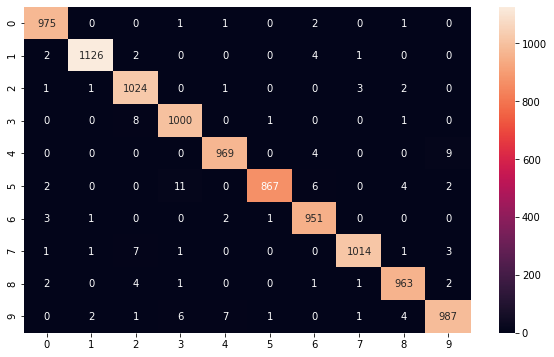

In [81]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g' )

# Testing on my data

In [84]:
my_number = X_test[0]
my_number.shape

(28, 28, 1)

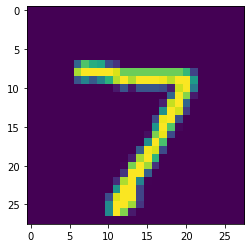

In [85]:
plt.imshow(my_number.reshape(28,28))

In [86]:
# batch_size, width, height, color_channels
model.predict_classes(my_number.reshape(1,28,28,1))

array([7], dtype=int64)